<a href="https://colab.research.google.com/github/SebasVasconez/sales-predictions/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CODING DOJO**
##Creado por: Sebastian Vasconez

* Fecha creado: 18/02/2023
* Fecha actualizacion: 19/03/2023
* Descripcion: Proyecto 1: parte 5

In [1]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

d="/content/sales_predictions.csv"

df=pd.read_csv(d)
df.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [3]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
#Revision de duplicados
df.duplicated().value_counts()

False    8523
dtype: int64

In [ ]:
#Revision de columnas innecesarias.

In [5]:
 #medir correlacion entre año de establecimiento y ventas para determinar si se elimina la columa

 df['Outlet_Establishment_Year'].corr(df['Item_Outlet_Sales'], method='pearson')
 #no tienen correlacion, podemos eliminar la columna ya que no aporta a nuestro estudio. 
 #En que año abrio no determinará el exito de las ventas del producto

-0.04913497044082089

In [6]:
 df['Item_Weight'].corr(df['Item_Outlet_Sales'], method='pearson')
 #Tiene correlacion baja, aun así podría dar una pista de como afecta el peso del producto

0.014122739280056456

In [7]:
 df['Item_Visibility'].corr(df['Item_Outlet_Sales'], method='pearson')

-0.12862461222077026

In [8]:
 df['Item_MRP'].corr(df['Item_Outlet_Sales'], method='pearson')

0.5675744466569194

In [9]:
#eliminacion columnas innecesarias
df = df.drop(columns=['Item_Identifier','Outlet_Establishment_Year','Outlet_Identifier'])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [10]:
#unicos en cada columna
df.nunique()

Item_Weight              415
Item_Fat_Content           5
Item_Visibility         7880
Item_Type                 16
Item_MRP                5938
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Item_Outlet_Sales       3493
dtype: int64

In [11]:
#Revision de inconsistencias en variables categoricas
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [12]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [14]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
df["Outlet_Location_Type"].value_counts()


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [16]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [17]:
#Identificacion de informacion faltante
df.isna().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

<ipython-input-18-0da47deb57d9>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, 'Frecuencia')

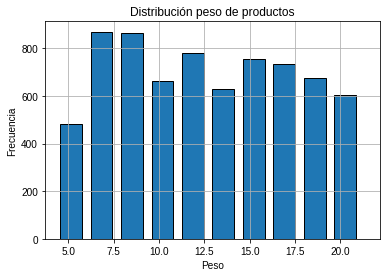

In [18]:
df["Item_Weight"].hist(width=1.2, edgecolor='black')
plt.style.use('seaborn')
plt.title("Distribución peso de productos")
plt.xlabel("Peso")
plt.ylabel("Frecuencia")

<ipython-input-19-ddcf6fa11e2c>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, 'Frecuencia')

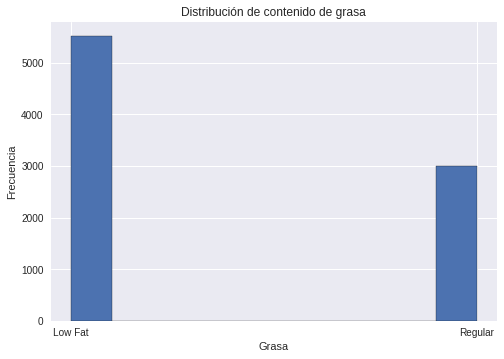

In [19]:
df["Item_Fat_Content"].hist(edgecolor='black')
plt.style.use('seaborn')
plt.title("Distribución de contenido de grasa")
plt.xlabel("Grasa")
plt.ylabel("Frecuencia")

<ipython-input-20-7d244a058d8b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


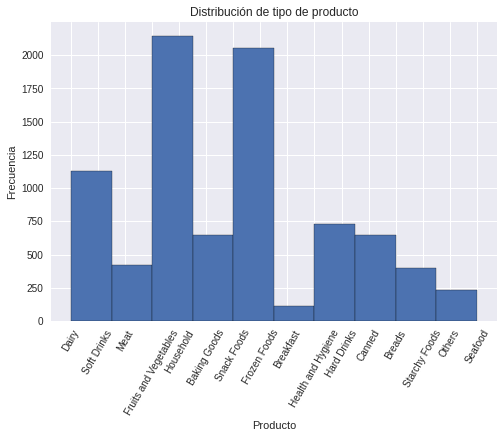

In [20]:
df["Item_Type"].hist(edgecolor='black')
plt.style.use('seaborn')
plt.title("Distribución de tipo de producto")
plt.xlabel("Producto")
plt.ylabel("Frecuencia")
plt.tick_params(axis='x', rotation=60)

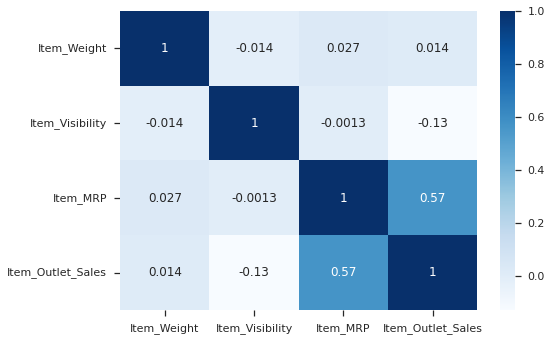

In [78]:
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.savefig('Matriz de correlación.png', dpi=400)

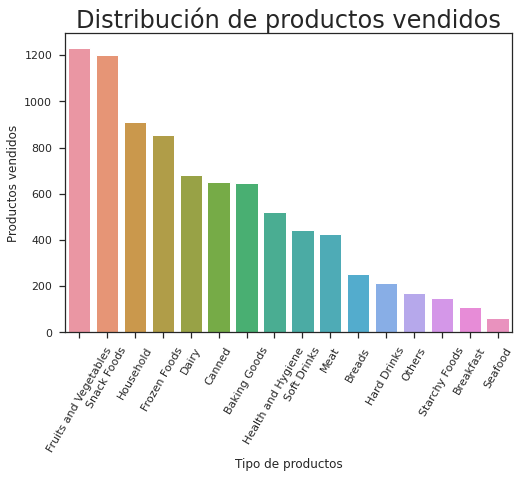

In [79]:
Producto=df["Item_Type"].value_counts()
sns.barplot(x=Producto.index, y=Producto.values)
plt.title('Distribución de productos vendidos', fontsize=24)
plt.xticks(rotation=60)
plt.xlabel('Tipo de productos')
plt.ylabel('Productos vendidos')
sns.color_palette("Paired")
plt.savefig('Distribucion productos.png', dpi=400)
plt.show()
     

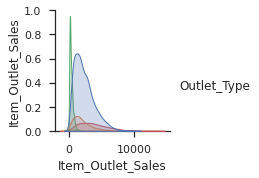

<Figure size 1080x1440 with 0 Axes>

In [27]:
v1= df.loc[:, ["Item_Outlet_Sales","Outlet_Type"]]

sns.set_theme(style="ticks")
sns.pairplot(v1, hue="Outlet_Type")
plt.figure(figsize = (15,20))
plt.show()

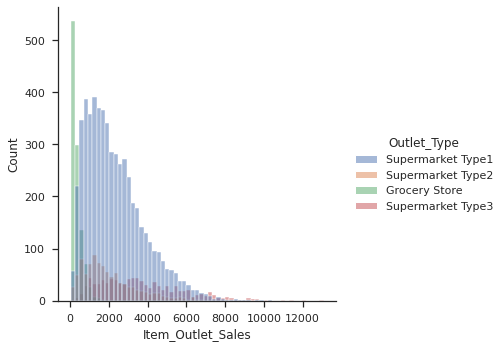

In [39]:
sns.displot(df, x="Item_Outlet_Sales", hue="Outlet_Type")

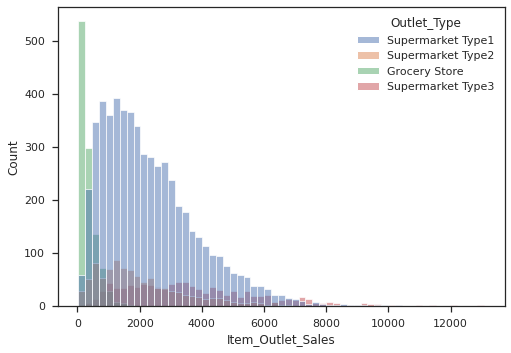

In [81]:
sns.histplot(df, x="Item_Outlet_Sales", hue="Outlet_Type")
plt.savefig('Conteo de ventas.png', dpi=400)

In [82]:
xx=df.groupby(df['Outlet_Type'])["Item_Outlet_Sales"].sum()
xx


Outlet_Type
Grocery Store        3.680343e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [121]:
import plotly.express as px
color_map={'Supermarket Type1':'lightcyan','Supermarket Type2':'cyan','Supermarket Type3':'royalblue','Grocery Store':'darkblue'}
fig = px.pie(df, values='Item_Outlet_Sales', names='Outlet_Type', title='Ventas por tipo de Mercado'
,color_discrete_map=color_map)
plt.savefig('Piechart ventas.png', dpi=400)
fig.show()

<Figure size 576x396 with 0 Axes>

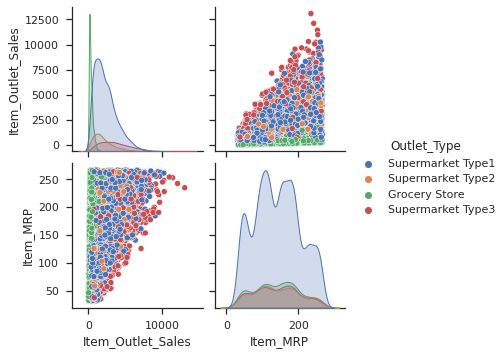

In [69]:
v1= df.loc[:, ["Item_Outlet_Sales","Outlet_Type","Item_MRP"]]

sns.set_theme(style="ticks")
sns.pairplot(v1, hue="Outlet_Type")

<ipython-input-84-2f685b3fa3c7>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



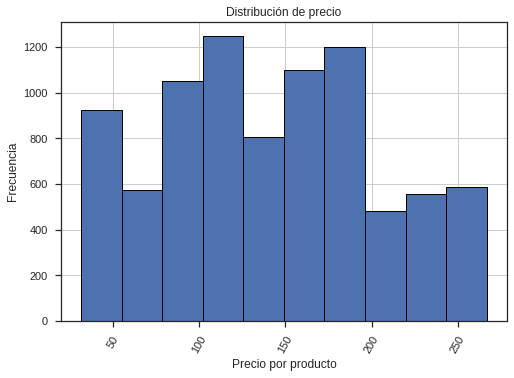

In [84]:
df["Item_MRP"].hist(edgecolor='black')
plt.style.use('seaborn')
plt.title("Distribución de precio")
plt.xlabel("Precio por producto")
plt.ylabel("Frecuencia")
plt.tick_params(axis='x', rotation=60)

<ipython-input-85-5a5a276bddef>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



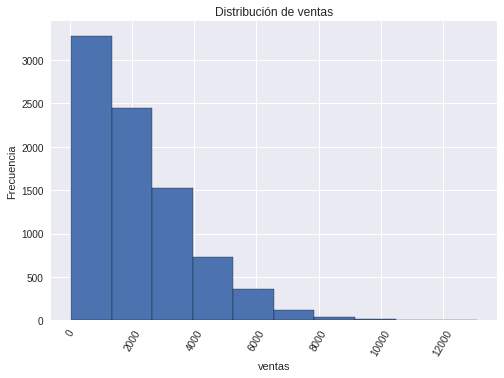

In [85]:
df["Item_Outlet_Sales"].hist(edgecolor='black')
plt.style.use('seaborn')
plt.title("Distribución de ventas")
plt.xlabel("ventas")
plt.ylabel("Frecuencia")
plt.tick_params(axis='x', rotation=60)

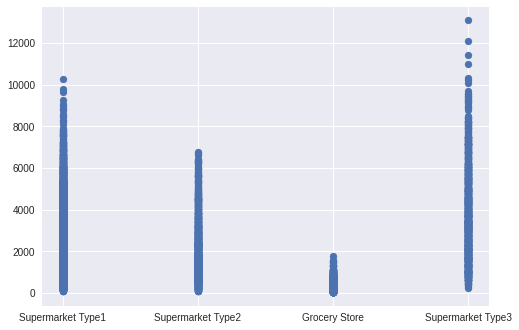

In [86]:
plt.scatter(df["Outlet_Type"], df["Item_Outlet_Sales"])

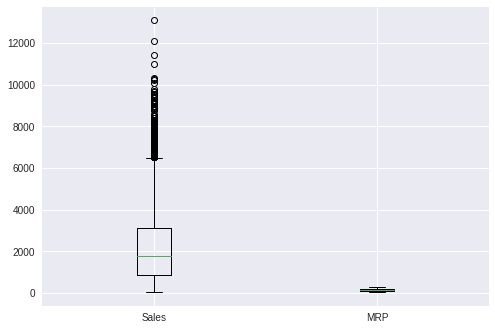

In [87]:
plt.boxplot([df["Item_Outlet_Sales"],df["Item_MRP"]], labels=['Sales','MRP']);

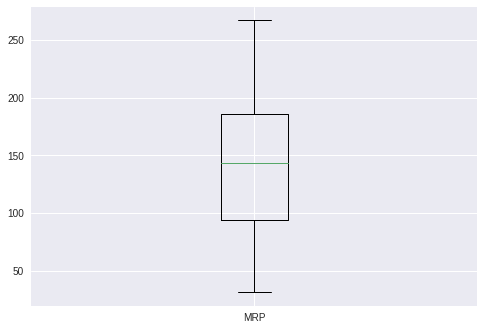

In [88]:
plt.boxplot([df["Item_MRP"]], labels=['MRP'])
plt.show()

Parte 5

In [89]:
#Codificación ordinal
df['Item_Fat_Content'].replace({'Low Fat':0.0, 'Regular':1.0}, inplace=True)
df['Item_Fat_Content'].value_counts()

0.0    5517
1.0    3006
Name: Item_Fat_Content, dtype: int64

In [90]:
df['Outlet_Size'].replace({'Small':1.0, 'Medium':2.0, 'High':3.0}, inplace=True)
df['Outlet_Size'].value_counts()

2.0    2793
1.0    2388
3.0     932
Name: Outlet_Size, dtype: int64

In [91]:
df['Outlet_Location_Type'].replace({'Tier 1':1.0, 'Tier 2':2.0, 'Tier 3':3.0}, inplace=True)
df['Outlet_Location_Type'].value_counts()

3.0    3350
2.0    2785
1.0    2388
Name: Outlet_Location_Type, dtype: int64

In [92]:
df['Outlet_Type'].replace({'Grocery Store':0.0, 'Supermarket Type1':1.0, 'Supermarket Type2':2.0, 'Supermarket Type3':3.0}, inplace=True)
df['Outlet_Type'].value_counts()

1.0    5577
0.0    1083
3.0     935
2.0     928
Name: Outlet_Type, dtype: int64

In [93]:
# El objetivo que intentamos predecir.
y = df['Item_Outlet_Sales']
# Las características que se usarán para hacer la predicción
X = df.drop(columns = 'Item_Outlet_Sales')

#2)
from sklearn.model_selection import train_test_split
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [94]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

6392
6392
2131
2131


In [95]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)


In [96]:
from sklearn.pipeline import make_pipeline
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [97]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f44e61ab310>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f44e61ab2b0>)])

In [98]:
# fit on train
preprocessor.fit(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f44e61ab310>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f44e61ab2b0>)])

In [99]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [100]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('')
print('shape of data is', X_train_processed.shape)

0 missing values in training data
0 missing values in testing data

All data in X_train_processed are float64
All data in X_test_processed are float64

shape of data is (6392, 23)


In [101]:
col=preprocessor.get_feature_names_out()
X_train = pd.DataFrame(X_train_processed, columns=col)
X_test = pd.DataFrame(X_test_processed, columns=col)

In [102]:
X_train.head()

,pipeline-1__Item_Weight,pipeline-1__Item_Fat_Content,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-1__Outlet_Size,pipeline-1__Outlet_Location_Type,pipeline-1__Outlet_Type,pipeline-2__Item_Type_Baking Goods,pipeline-2__Item_Type_Breads,pipeline-2__Item_Type_Breakfast,...,pipeline-2__Item_Type_Fruits and Vegetables,pipeline-2__Item_Type_Hard Drinks,pipeline-2__Item_Type_Health and Hygiene,pipeline-2__Item_Type_Household,pipeline-2__Item_Type_Meat,pipeline-2__Item_Type_Others,pipeline-2__Item_Type_Seafood,pipeline-2__Item_Type_Snack Foods,pipeline-2__Item_Type_Soft Drinks,pipeline-2__Item_Type_Starchy Foods
0,0.817249,-0.740321,-0.712775,1.828109,4.077854e-01,1.084948,0.983572,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.556340,1.350766,-1.291052,0.603369,4.077854e-01,1.084948,0.983572,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.131512,1.350766,1.813319,0.244541,4.077854e-01,-1.384777,-0.263600,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.169219,-0.740321,-1.004931,-0.952591,-1.291630e+00,-0.149914,-0.263600,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.528819,-0.740321,-0.965484,-0.336460,-3.773459e-16,-0.149914,-0.263600,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
X_test.head()

,pipeline-1__Item_Weight,pipeline-1__Item_Fat_Content,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-1__Outlet_Size,pipeline-1__Outlet_Location_Type,pipeline-1__Outlet_Type,pipeline-2__Item_Type_Baking Goods,pipeline-2__Item_Type_Breads,pipeline-2__Item_Type_Breakfast,...,pipeline-2__Item_Type_Fruits and Vegetables,pipeline-2__Item_Type_Hard Drinks,pipeline-2__Item_Type_Health and Hygiene,pipeline-2__Item_Type_Household,pipeline-2__Item_Type_Meat,pipeline-2__Item_Type_Others,pipeline-2__Item_Type_Seafood,pipeline-2__Item_Type_Snack Foods,pipeline-2__Item_Type_Soft Drinks,pipeline-2__Item_Type_Starchy Foods
0,3.310089e-01,-0.740321,-0.776646,-0.998816,2.107200,1.084948,-0.263600,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.179892e+00,-0.740321,0.100317,-1.585194,-1.291630,-1.384777,-0.263600,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.784469e-01,1.350766,-0.482994,-1.595784,0.407785,-1.384777,-0.263600,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.213344e-16,1.350766,-0.415440,0.506592,0.407785,1.084948,2.230744,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-6.426567e-01,1.350766,-1.047426,0.886725,-1.291630,-0.149914,-0.263600,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [104]:
#Corrección de titulos
col= X_train.columns
coln = [i[12:] for i in col]
X_train.columns = coln
X_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'],
      dtype='object')

In [105]:
col2= X_test.columns
coln2 = [j[12:] for j in col2]
X_test.columns = coln2
X_test.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'],
      dtype='object')

In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      6392 non-null   float64
 1   Item_Fat_Content                 6392 non-null   float64
 2   Item_Visibility                  6392 non-null   float64
 3   Item_MRP                         6392 non-null   float64
 4   Outlet_Size                      6392 non-null   float64
 5   Outlet_Location_Type             6392 non-null   float64
 6   Outlet_Type                      6392 non-null   float64
 7   Item_Type_Baking Goods           6392 non-null   float64
 8   Item_Type_Breads                 6392 non-null   float64
 9   Item_Type_Breakfast              6392 non-null   float64
 10  Item_Type_Canned                 6392 non-null   float64
 11  Item_Type_Dairy                  6392 non-null   float64
 12  Item_Type_Frozen Foo

In [107]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2131 entries, 0 to 2130
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      2131 non-null   float64
 1   Item_Fat_Content                 2131 non-null   float64
 2   Item_Visibility                  2131 non-null   float64
 3   Item_MRP                         2131 non-null   float64
 4   Outlet_Size                      2131 non-null   float64
 5   Outlet_Location_Type             2131 non-null   float64
 6   Outlet_Type                      2131 non-null   float64
 7   Item_Type_Baking Goods           2131 non-null   float64
 8   Item_Type_Breads                 2131 non-null   float64
 9   Item_Type_Breakfast              2131 non-null   float64
 10  Item_Type_Canned                 2131 non-null   float64
 11  Item_Type_Dairy                  2131 non-null   float64
 12  Item_Type_Frozen Foo

Regresion Lineal

In [108]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

print(reg.coef_)
print(reg.intercept_)

[ -10.16918859   34.63859484  -84.49010837  983.16061408  186.82152544
 -318.81434948  776.42455602  -24.57295579  -48.85594407   43.38241353
   26.49024156 -133.0709718   -24.65481932   29.57281019   19.39615989
  -12.85719227  -20.01611895  -51.10494499  -99.69875079  290.04063254
  -40.55899947  -40.71387956   87.2223193 ]
2230.3744673916667


In [109]:
train_score = round(reg.score(X_train, y_train),2)
print("Entrenamiento:",train_score)

test_score = round(reg.score(X_test, y_test),2)
print("Prueba:",test_score)

Entrenamiento: 0.51
Prueba: 0.5


In [110]:
import warnings
warnings.filterwarnings('ignore')

# Predicciones del conjunto de entrenamiento
train_preds = reg.predict(X_train_processed)
# Predicciones del conjunto de prueba
test_preds = reg.predict(X_test_processed)


In [111]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


mae_train = mean_absolute_error(y_train, train_preds).round(2)
mae_test = mean_absolute_error(y_test, test_preds).round(2)

print("EAM Error Train:",mae_train)
print("EAM Error Test:",mae_test)
print("")

mse_train = mean_squared_error(y_train, train_preds).round(2)
mse_test = mean_squared_error(y_test, test_preds).round(2)
print("MSE Error Train:",mse_train)
print("MSE Error Test:",mse_test)
print("")

rmse_train = np.sqrt(mean_squared_error(y_train, train_preds)).round(2)
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds)).round(2)
print("RMSE Error Train:",rmse_train)
print("RMSE Error Test:",rmse_test)

EAM Error Train: 911.06
EAM Error Test: 872.73

MSE Error Train: 1461347.79
MSE Error Test: 1365856.68

RMSE Error Train: 1208.86
RMSE Error Test: 1168.7


* Mediante regresión lineal se obtuvo un R^2 de 0.5, este índice es un poco bajo, por lo que para poder predecir el precio de una forma mas exacta, es necasario probar otros modelos.

* El RMSE Error es de aproximadamente $1200 

Árbol de regresión

In [112]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [113]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)


In [114]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.15866641598692743


* Vemos que el modelo de árbol de regresión sobreajustó el modelo, esto causa que sea capaz de predecir con exactitud los resultados del set de datos de entrenamiento, pero al momento de ingresar los datos de prueba falla por lo que el R^2 es muy bajo (0.15) Bajo estos parametros, no sería un buen módelo. Para solicionar este problema se puede cambiar los hiperparámetros del modelo para buscar el punto optimo que minimice los errores en las predicciones.


In [115]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

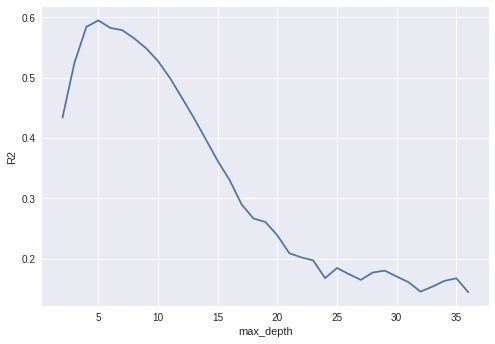

In [116]:
max_depth_range = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)



plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [117]:
dec_tree = DecisionTreeRegressor(random_state = 42, max_depth=5)
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [118]:
train_score = dec_tree.score(X_train_processed, y_train).round(2)
test_score = dec_tree.score(X_test_processed, y_test).round(2)
print(train_score)
print(test_score)

0.6
0.59


In [119]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)


In [120]:
mae_train = mean_absolute_error(y_train, train_preds).round(2)
mae_test = mean_absolute_error(y_test, test_preds).round(2)

print("EAM Error Train:",mae_train)
print("EAM Error Test:",mae_test)
print("")

mse_train = mean_squared_error(y_train, train_preds).round(2)
mse_test = mean_squared_error(y_test, test_preds).round(2)
print("MSE Error Train:",mse_train)
print("MSE Error Test:",mse_test)
print("")

rmse_train = np.sqrt(mean_squared_error(y_train, train_preds)).round(2)
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds)).round(2)
print("RMSE Error Train:",rmse_train)
print("RMSE Error Test:",rmse_test)

EAM Error Train: 762.61
EAM Error Test: 738.32

MSE Error Train: 1172122.77
MSE Error Test: 1118185.97

RMSE Error Train: 1082.65
RMSE Error Test: 1057.44


* Ahora se obtuvo un R^2 de 0.6, mejor que el obtenido mediante la regresión lineal.
* Además, el RMSE Error disminuyó a $1057.44 en comparación al modelo de regresión.
* Por ende, se recomienda el uso del modelo de arboles de regresión ya que se acerca más al comportamiento de los datos.